# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [2]:
from src.make_db import create_movies_db

In [3]:
create_movies_db()

OperationalError: database is locked

![movies.db schema](images/movies_db_schema.png)

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

In [6]:
cur.execute('''SELECT * FROM rotten_tomatoes_movies''')
rotten_tomatoes = pd.read_sql('''SELECT * FROM rotten_tomatoes_movies''', conn)

In [67]:
rt_genres = rotten_tomatoes.set_index('genres')

In [69]:
rotten_tomatoes.groupby('genres').mean()

,idx,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
genres,,,,,,,,,
Action & Adventure,8753.681373,105.113861,36.965686,64.504902,46.882353,255010.588235,14.779412,28.686275,35.828431
"Action & Adventure, Animation",9467.300000,79.052632,81.850000,17.550000,77.800000,7495.100000,2.750000,11.200000,6.350000
"Action & Adventure, Animation, Anime & Manga, Art House & International",14030.000000,121.000000,80.000000,10.000000,58.000000,1989.000000,1.000000,8.000000,2.000000
"Action & Adventure, Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy",5988.000000,101.666667,60.333333,26.666667,74.333333,22141.000000,7.666667,14.666667,12.000000
"Action & Adventure, Animation, Anime & Manga, Drama",3235.000000,85.000000,82.000000,17.000000,39.000000,1127.000000,0.000000,14.000000,3.000000
...,...,...,...,...,...,...,...,...,...
"Science Fiction & Fantasy, Special Interest",9288.000000,93.000000,94.000000,51.000000,85.000000,7332.000000,13.000000,48.000000,3.000000
"Science Fiction & Fantasy, Western",12100.000000,98.000000,88.000000,49.000000,70.000000,1092.000000,6.000000,43.000000,6.000000
Special Interest,12975.333333,101.500000,83.333333,9.666667,78.500000,223.000000,2.000000,8.333333,1.333333


In [10]:
movie_budgets = pd.read_sql('''SELECT * FROM tn_movie_budgets''', conn)

In [11]:
movie_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
tmdb = pd.read_sql('''SELECT * FROM tmdb_movies''', conn)

In [117]:
tmdb.sort_values('popularity', ascending=False).head(60)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [99]:
x = tmdb.sort_values('popularity', ascending=False).head(25).title.values
y = tmdb.sort_values('popularity', ascending=False).head(25).popularity

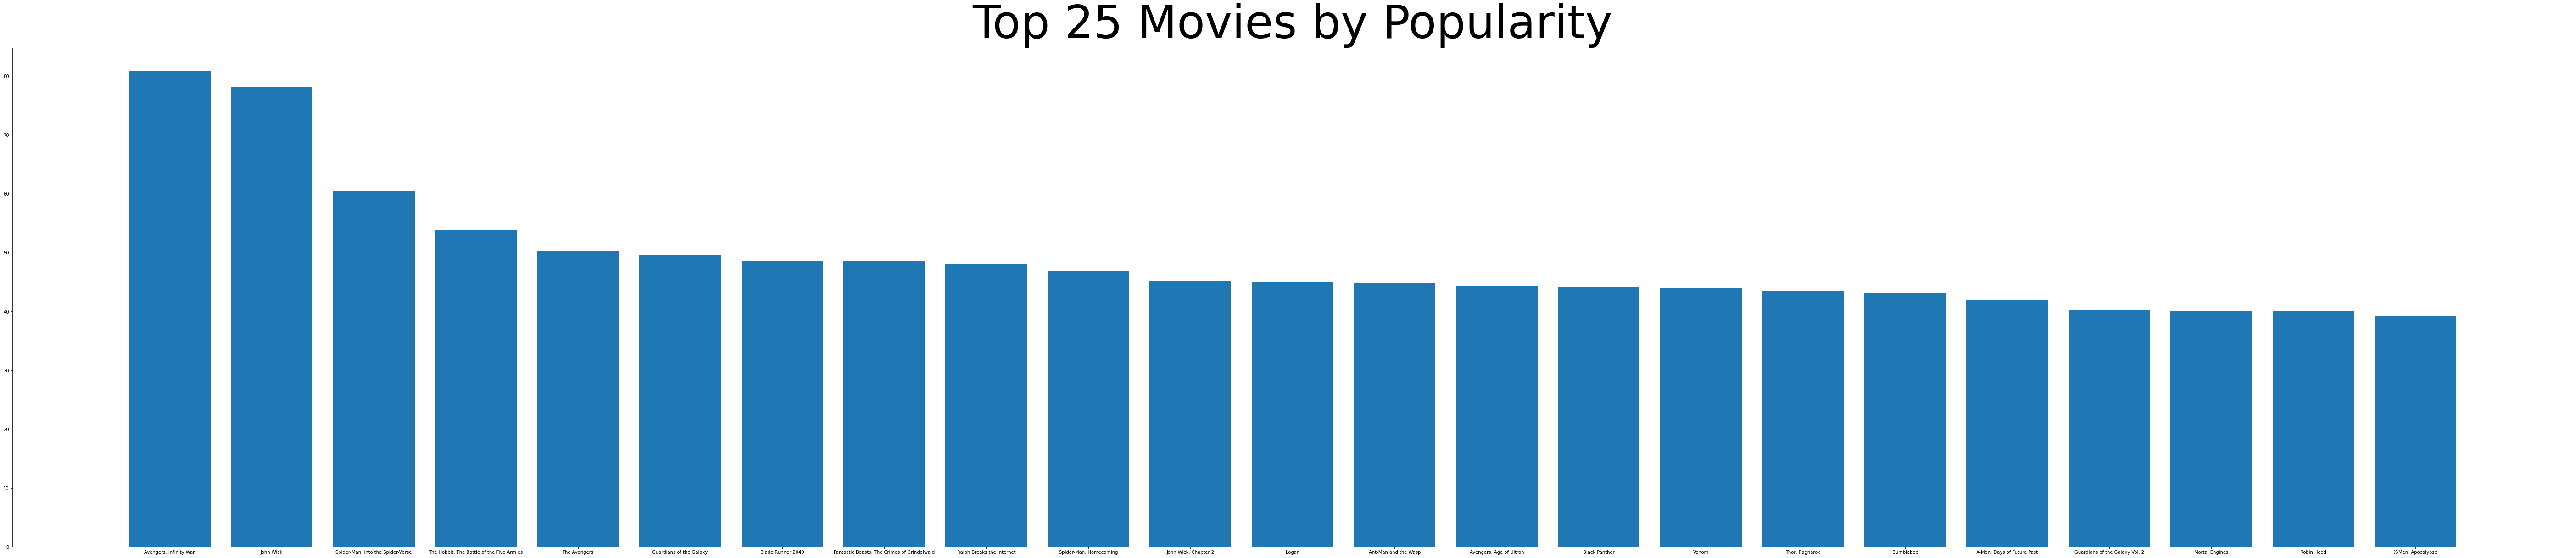

In [120]:
fig, ax = plt.subplots(figsize=(100,20))
ax.bar(x, y)
ax.set_title('Top 25 Movies by Popularity', fontsize=100);

In [20]:
movie_gross = pd.read_sql('''SELECT * FROM bom_movie_gross''', conn)

In [21]:
movie_gross.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
pd.read_sql('''SELECT * FROM tmdb_movies JOIN imdb_title_basics on primary_title''', conn)